# Análisis Exploratorio de Datos

Github, Twitter: @cdchushig

## Dataset: Titanic Disaster

El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de colisionar con un iceberg, matando a 1502 de 2224 pasajeros y tripulantes. Esta sensacional tragedia conmocionó a la comunidad internacional y condujo a mejores regulaciones de seguridad para los buques.

Una de las razones por las que el naufragio provocó tal pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

## Breve descripción de los datos 

| Features       | Description |
|----------------|-------------|
|   PassengerId  | 	Id |
|   Survived  | Survival 0 = No, 1 = Yes |
|   PClass  | Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd |
|   Name  | Name of passenger |
|   Sex  | Sex |
|   Age  | Age in years |
|   SibSp  | # of siblings / spouses aboard the Titanic	 |
|   Parch  | 	# of parents / children aboard the Titanic	 |
|   Ticket  | Ticket number |
|   Fare  | Passenger fare |
|   Cabin  | Cabin number |
|   Embarked  | Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton |


## Cargando librerías

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

## Cargando dataset

Tenemos varios opciones para cargar un dataset. Depende con que extensión de dataset trabajaremos. Cuando tenemos
un dataset en formato **csv** podemos usar Pandas o SciPy para cargarlo. Dado que tenemos un dataset en formato csv 
vamos a optar por cargarlo con **Pandas**. 

### Cargando dataset desde url

Pandas te permite cargar un dataset a través de una url. **Es importante** validar que formato tiene el dataset que
procederemos a descargar.

In [3]:
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df_from_url = pd.read_csv(url, names=names)
pima_df_from_url.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Cargando dataset desde archivo local
Comprobar que el dataset en formato **.csv** esté en el directorio. Para ello usamos el comando de shell _ls_.

In [4]:
!ls -la

total 696
drwxr-xr-x 12 jovyan users    408 Feb 14 12:16 .
drwsrwsr-x  1 jovyan users   4096 Feb 12 13:45 ..
-rw-r--r--  1 jovyan users   7014 Feb 13 17:34 1_introduction.ipynb
-rw-r--r--  1 jovyan users   9321 Feb 13 17:05 2_widgets.ipynb
-rw-r--r--  1 jovyan users 101942 Feb 14 08:13 eda_pima.ipynb
-rw-r--r--  1 jovyan users  73935 Feb 14 11:07 eda_pima_v2.ipynb
drwxr-xr-x  7 jovyan users    238 Feb 14 08:10 .ipynb_checkpoints
-rw-r--r--  1 jovyan users  23873 Feb 13 14:27 pima.csv
-rw-r--r--  1 jovyan users  32191 Feb 14 10:55 pima_custom.csv
-rw-r--r--  1 jovyan users     35 Feb 13 11:15 plain_text.txt
-rw-r--r--  1 jovyan users  60302 Feb 14 08:16 titanic.csv
-rw-r--r--  1 jovyan users 383904 Feb 14 12:16 titanic_eda.ipynb


In [5]:
df_titanic = pd.read_csv('titanic.csv')

## Validando Dataframe

In [6]:
type(df_titanic)

pandas.core.frame.DataFrame

In [7]:
df_titanic.shape

(891, 12)

In [8]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Eligiendo que estructura de datos utilizar

Comprobamos las dimensiones del dataset que estamos usando. Podemos usar **numpy** o **pandas**. Existen varias tendencias para la elección de estas librerías. Dependerá del problema a tratar. Generalmente, hay 2 tendencias para esta elección.

1. Numpy: Data scientist que han trabajado en entornos MATLAB están familiarizados con slices and selections.
2. Pandas: Data engineeer que han trabajado con bases de datos relacionales ven más simple el análisis como una _table_.

**Para el tratamiento como numpy array necesitamos una conversion**


In [11]:
m_titanic = df_titanic.as_matrix()
type(m_titanic)

numpy.ndarray

## Describiendo los datos

In [12]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Cuántos sobrevivieron

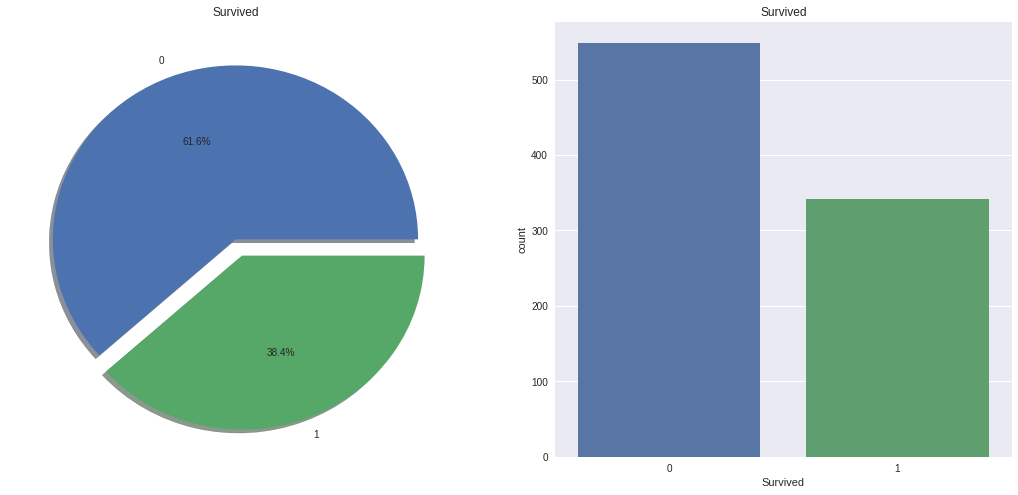

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_titanic['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_titanic, ax=ax[1])
ax[1].set_title('Survived')

(array([ 549.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  342.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

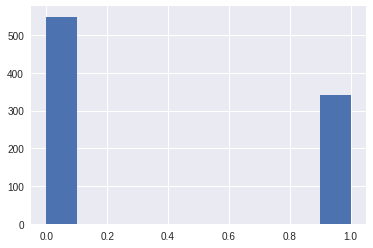

In [15]:
plt.hist(df_titanic['Survived'])
# fracs = df_titanic['Survived'].value_counts()
# labels=['dead', 'lived']
# plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

Es evidente que muchos pasajeros no sobrevivieron al accidente. De los 891 pasajeros, solo **350 sobrevivieron**. 
solo el 38.4% del total de los pasajeros. 

**Pero podemos indagar más en los features que tenemos para conseguir mayor conocimiento del desastre.**

## Revisando los tipos de datos

In [16]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Categorical Features**
   

Una variable categórica es aquella que tiene dos o más categorías y cada valor en esa característica puede ser categorizado por ellas. Por ejemplo, el género es una variable categórica que tiene dos categorías (masculino y femenino). Ahora no podemos ordenar ni dar ningún pedido a tales variables. También se conocen como variables nominales.

Categorical Features en nuestro dataset: Sex, Embarked, Survived.

**Ordinal Features**


Una variable ordinal es similar a los valores categóricos, pero la diferencia entre ellos es que podemos tener orden relativo u ordenar entre los valores. Por ejemplo: si tenemos una característica como Altura con valores Alto, Medio, Corto, entonces Altura es una variable ordinal. Aquí podemos tener un tipo relativo en la variable.

Ordinal Features en nuestro dataset: PClass

**Numerical Feature**

Se dice que una característica es continua si puede tomar valores entre dos puntos cualquiera o entre los valores mínimo o máximo en la columna de características.

Continuo: Age, Fare. 
Discreto: SibSp, Parch.

### ¿Cuántos valores nulos tenemos?

In [17]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Analizando los features

### Analizando el sexo

In [18]:
df_titanic.groupby(['Sex','Survived'])['Survived'].count()
# df_titanic.groupby(['Sex','Pclass', 'Survived'])['Survived'].count()
# df_titanic.groupby(['Sex','Pclass', 'Embarked'])['Embarked'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

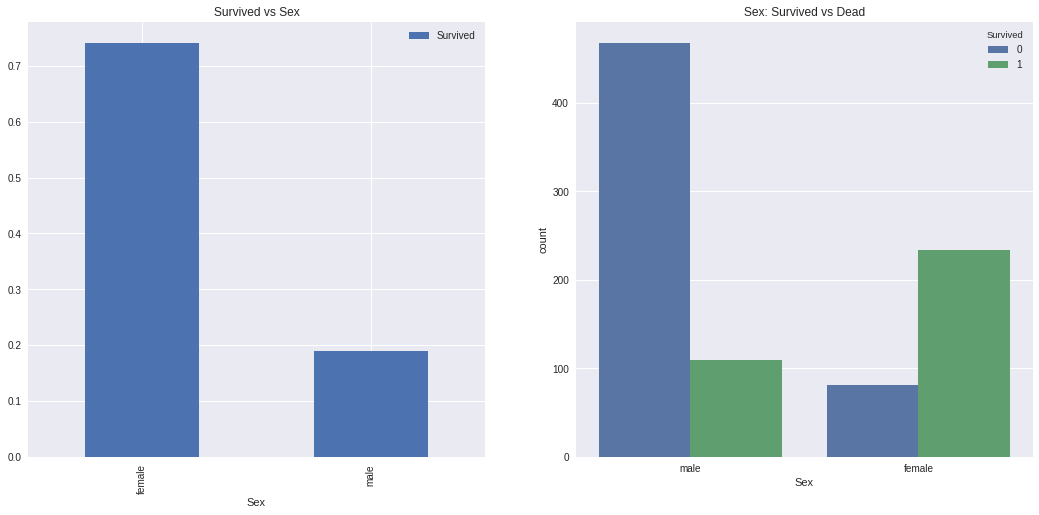

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_titanic,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


Esto es interesante. La cantidad de hombres en el barco es mucho mayor que la cantidad de mujeres. Aún así, la cantidad de mujeres que se salvan es casi el doble de la cantidad de hombres que se salvan. La tasa de supervivencia de una mujer en el barco es de alrededor del 75%, mientras que la de los hombres en alrededor del 18-19%.

Esta parece ser una característica muy importante para el modelado. **Pero, ¿es el mejor? Seguimos analizando nuestras features.**

### Analizando Pclass

In [20]:
pd.crosstab(df_titanic.Pclass, df_titanic.Survived, margins=True).style.background_gradient(cmap='summer_r')
# viridis
# df_titanic.groupby(['Pclass','Survived'])['Pclass'].count()

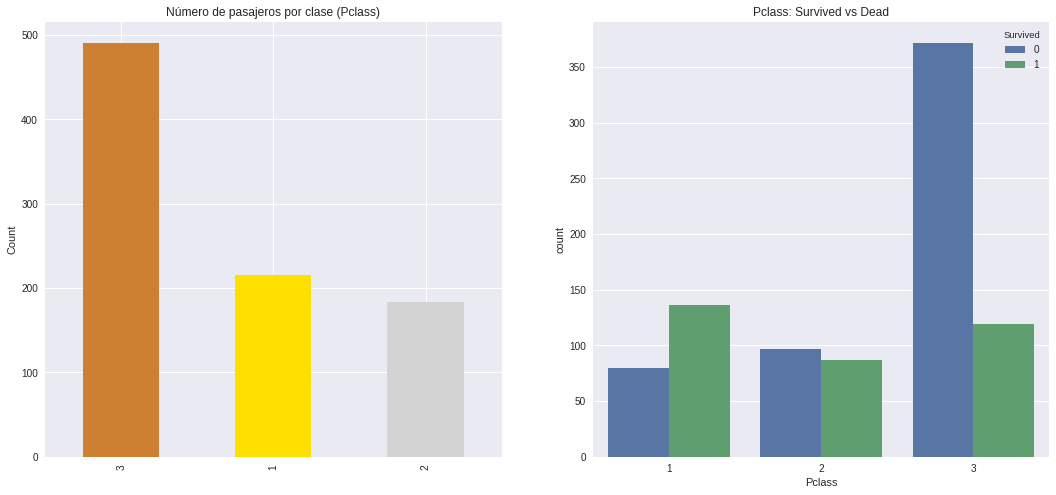

In [21]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])

ax[0].set_title('Número de pasajeros por clase (Pclass)')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_titanic, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

**La gente dice que el dinero no puede comprar todo.** 

Pero podemos ver claramente que los pasajeros de la clase 1 recibió una prioridad muy alta durante el rescate. A pesar de que el número de Pasajeros en la Clase 3 fue mucho más alto, aún el número de supervivencia de ellos fue muy bajo, alrededor del 25%.

**Que tal nuestro mundo materialista?**

In [22]:
pd.crosstab([df_titanic.Sex, df_titanic.Survived], df_titanic.Pclass, margins=True).style.background_gradient(cmap='summer_r')

## Analizando la edad

In [23]:
print('Pasajero más viejo:', df_titanic['Age'].max(), 'Años')
print('Pasajero más joven:', df_titanic['Age'].min(), 'Años')
print('Pasajero promedio:', df_titanic['Age'].mean(), 'Años')

Pasajero más viejo: 80.0 Años
Pasajero más joven: 0.42 Años
Pasajero promedio: 29.6991176471 Años


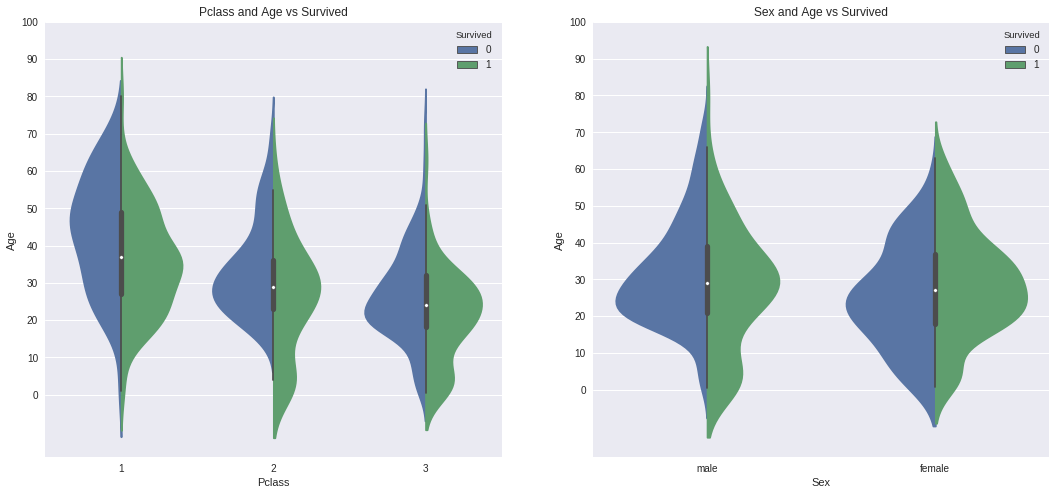

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=df_titanic, split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex","Age", hue="Survived", data=df_titanic, split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


**Observaciones**

1) El número de niños aumenta con Pclass y la tasa de supervivencia para **pasajeros** por debajo de los 10 años (es decir, niños) parece ser buena independientemente de la Pclass.

2) Las posibilidades de supervivencia para **pasajeros** de entre 20 y 50 años de Pclass1 son altas y aún mejores para las mujeres.

3) Para los hombres, las posibilidades de supervivencia disminuyen con un aumento en la edad.

Como vimos anteriormente, el feature Edad tiene 177 valores nulos. Para reemplazar estos valores de NaN, podemos asignarles la edad media del conjunto de datos. Pero el problema es que había muchas personas con muchas edades diferentes. Simplemente no podemos asignar un niño de 4 años con una edad promedio de 29 años. ¿Hay alguna forma de averiguar qué edad tiene el pasajero?

**Idea interesante!**, podemos verificar la función Nombre. Mirando la característica, podemos ver que los nombres tienen un saludo como Mr o Mrs. Así podemos asignar los valores medios de Mr and Mrs a los grupos respectivos.

In [26]:
df_titanic['Initial'] = 0
for i in df_titanic:
    df_titanic['Initial']=df_titanic.Name.str.extract('([A-Za-z]+)\.')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
pd.crosstab(df_titanic.Initial, df_titanic.Sex).T.style.background_gradient(cmap='summer_r')

In [28]:
df_titanic['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [29]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
df_titanic.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

## Filling NaN en la edad

In [31]:
df_titanic.loc[(df_titanic.Age.isnull())&(df_titanic.Initial=='Mr'),'Age'] = 33
df_titanic.loc[(df_titanic.Age.isnull())&(df_titanic.Initial=='Mrs'),'Age'] = 36
df_titanic.loc[(df_titanic.Age.isnull())&(df_titanic.Initial=='Master'),'Age'] = 5
df_titanic.loc[(df_titanic.Age.isnull())&(df_titanic.Initial=='Miss'),'Age'] = 22
df_titanic.loc[(df_titanic.Age.isnull())&(df_titanic.Initial=='Other'),'Age'] = 46

In [32]:
df_titanic['Age'].isnull().any()

False

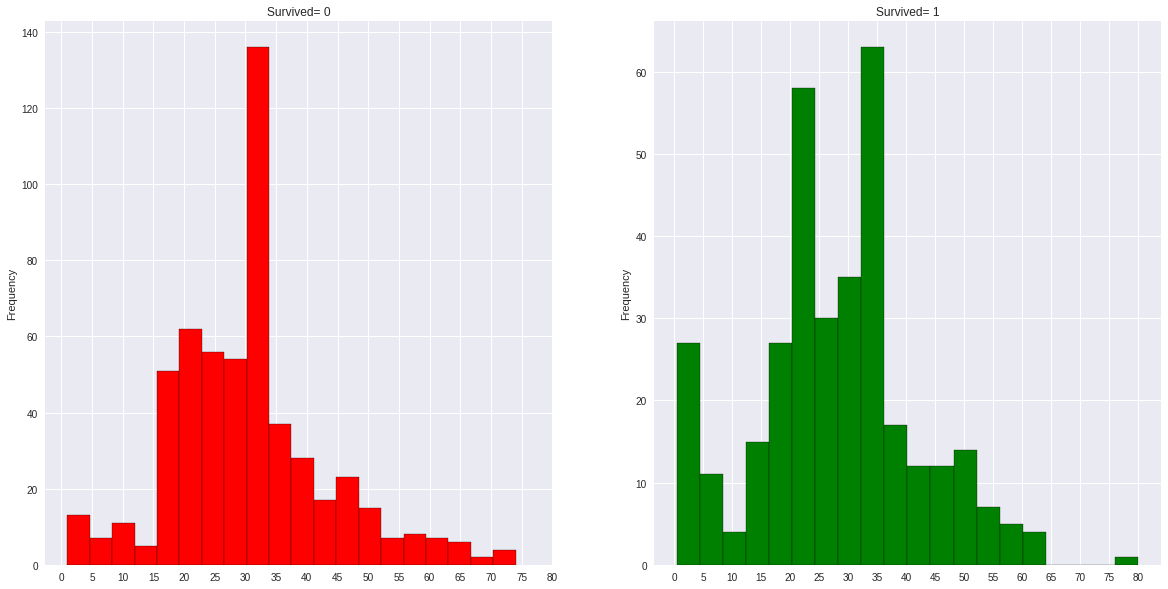

In [33]:
f, ax = plt.subplots(1,2,figsize=(20,10))

df_titanic[df_titanic['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

df_titanic[df_titanic['Survived'] == 1].Age.plot.hist(ax=ax[1],color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# plt.hist(df_titanic['Age'])

**Observaciones**

1) Los niños pequeños (edad <5) se salvaron en grandes cantidades (La política de mujeres y niños primero).

2) El pasajero más viejo fue salvado (80 años).

3) Número máximo de muertes en el grupo de edad de 20-40.

## Analizando feature Embarked

In [34]:
pd.crosstab([df_titanic.Embarked,df_titanic.Pclass],[df_titanic.Sex,df_titanic.Survived], margins=True).style.background_gradient(cmap='summer_r')

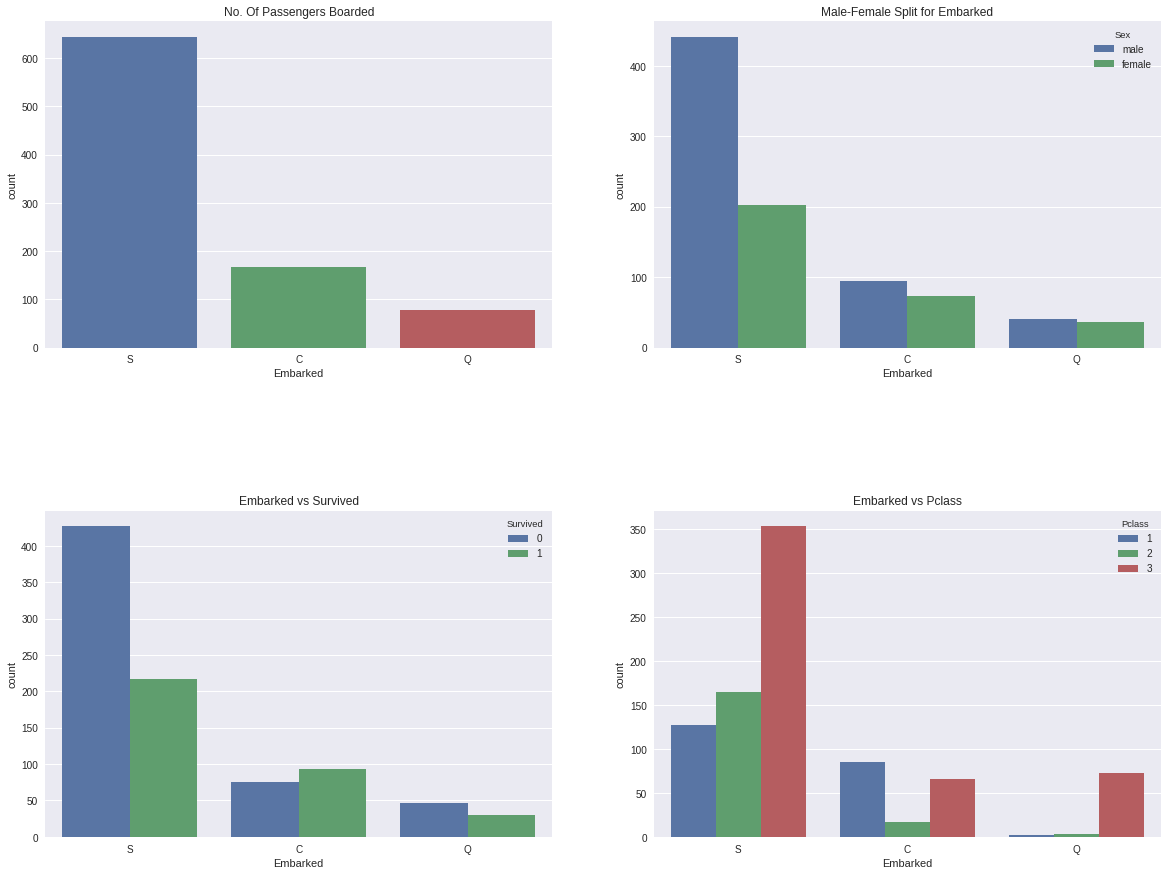

In [35]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=df_titanic,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=df_titanic,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=df_titanic,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_titanic,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)


**Observaciones**

1) Pasajeros máximos embarcados de S. La mayoría de ellos son de Pclass3.

2) Los Pasajeros de C parecen ser afortunados ya que una buena proporción de ellos sobrevivió. La razón de esto quizás sea el rescate de todos los Pasajeros Pclass1 y Pclass2.

3) El Embark S mira hacia el puerto desde donde abordó la mayoría de los ricos. Todavía las posibilidades de supervivencia son bajas aquí, porque muchos pasajeros de Pclass3 alrededor del 81% no sobrevivieron.

4) El Puerto Q tenía casi el 95% de los pasajeros eran de Pclass3.

## Filling NaN feature Embarked

In [36]:
df_titanic['Embarked'].fillna('S',inplace=True)

In [37]:
df_titanic.Embarked.isnull().any()

False

## Observación de todos los features

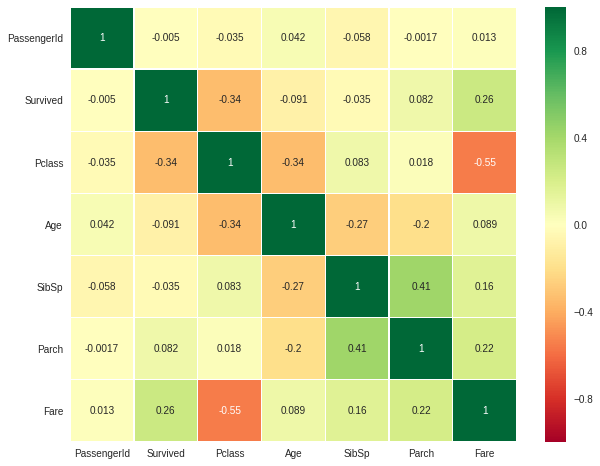

In [38]:
sns.heatmap(df_titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Interpretando el mapa de calor**

Lo primero que debe tenerse en cuenta es que solo se comparan las características numéricas, ya que es obvio que no podemos correlacionar strings u objetos. Antes de entender la trama, veamos qué es exactamente la correlación.

**CORRELACIÓN POSITIVA**

Si un aumento en la característica A conduce a un aumento en la característica B, entonces se correlacionan positivamente. Un valor 1 significa una correlación positiva perfecta.

**CORRELACIÓN NEGATIVA**

Si un aumento en la característica A conduce a una disminución en la característica B, entonces están negativamente correlacionados. Un valor -1 significa una correlación negativa perfecta.

Ahora digamos que dos características están altamente o perfectamente correlacionadas, por lo que el aumento en uno lleva a aumentar en el otro. Esto significa que ambas características contienen información muy similar y hay muy poca o ninguna variación en la información. Esto se conoce como MultiColinearity ya que ambos contienen casi la misma información.

Entonces, ¿crees que deberíamos usar ambos, ya que uno de ellos es redundante? Al crear o entrenar modelos, debemos tratar de eliminar las características redundantes, ya que reduce el tiempo de capacitación y muchas de esas ventajas.

Ahora desde el mapa de calor anterior, podemos ver que las características no están muy correlacionadas. La mayor correlación es entre SibSp y Parch, es decir, 0.41. Entonces podemos continuar con todas las funciones.

In [39]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Initial        891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Conviertiendo strings a tipos numéricos

In [40]:
df_titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
df_titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_titanic['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [41]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Initial        891 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


## Eliminando features innecesarios


**PassengerId.** No puede ser categorizado.

**Name.** No puede ser categorizado.


In [42]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


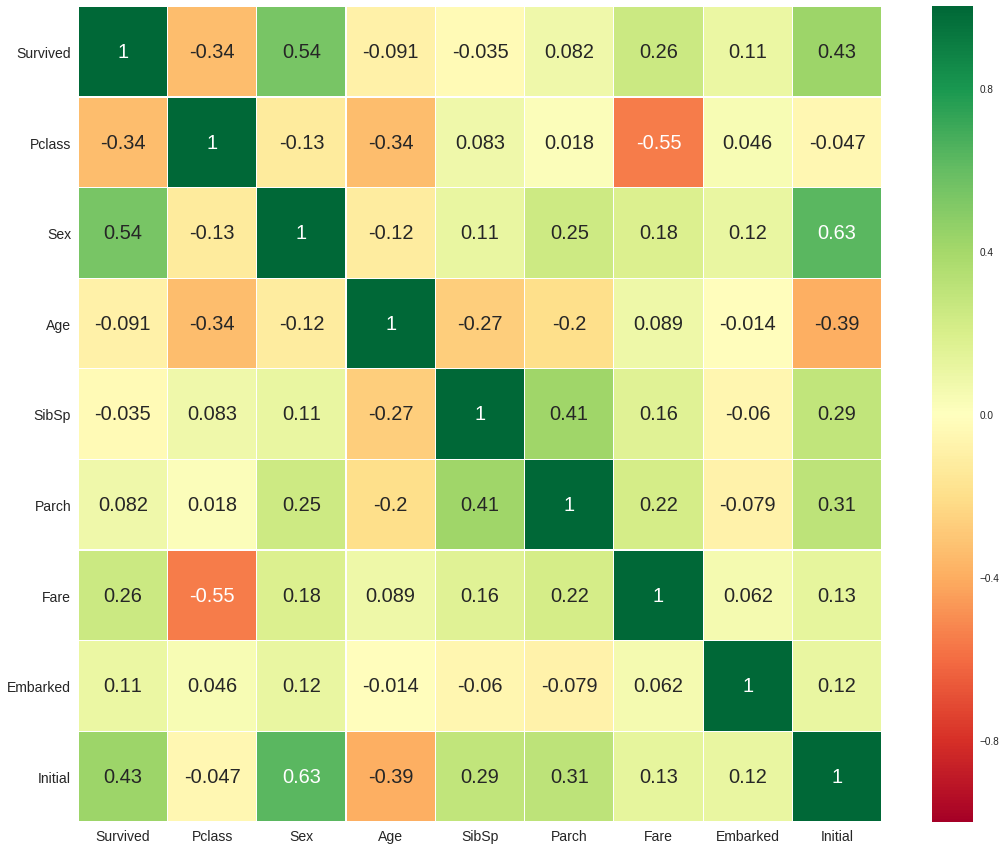

In [43]:
df_titanic.drop(['Name', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(df_titanic.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})

fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Guardando nuestro Dataframe en un fichero

In [44]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [47]:
df_titanic.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Initial'], dtype=object)

In [48]:
file_name_titanic = 'titanic_custom.csv'
df_titanic.to_csv(file_name_titanic)

## Normalizar los datos

Podemos normalizar los datos a mano como hicimos en las visualizaciones, pero existen librerías testeadas que hacen
un muy buen trabajo para estandarización y normalización. La librería más utilizada en preprocesado es **ScikitLearn.**

Para un primer contacto con **ScikitLearn** utilizaremos la package preprocessing. Y para evitar mayor complejidad en
el Análisis Exploratorio de Datos solo haremos la normalización de un feature, la edad.

In [49]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,0,1
4,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [50]:
m_age = df_titanic['Age'].as_matrix()

In [51]:
m_age_reshape = np.reshape(m_age, (-1, 1))

In [52]:
scaler_presence = preprocessing.Binarizer()
scaler_freq = preprocessing.StandardScaler()

In [53]:
m_age_presence = scaler_presence.fit_transform(m_age_reshape)
m_age_presence[0:5, :]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [54]:
m_age_freq = scaler_freq.fit_transform(m_age_reshape)
m_age_freq[0:5, :]

array([[-0.59077149],
       [ 0.61458609],
       [-0.28943209],
       [ 0.38858155],
       [ 0.38858155]])

(array([   0.,    0.,    0.,    0.,    0.,  891.,    0.,    0.,    0.,    0.]),
 array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5]),
 <a list of 10 Patch objects>)

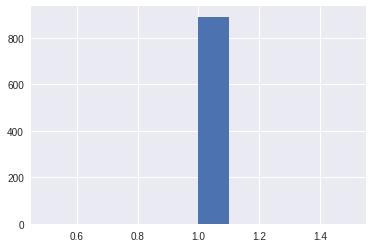

In [62]:
plt.hist(m_age_presence)

(array([  40.,   18.,   15.,   31.,   79.,  134.,   85.,   84.,  210.,
          45.,   35.,   35.,   29.,   16.,   13.,   11.,    4.,    5.,
           1.,    1.]),
 array([-2.21649752, -1.91674016, -1.6169828 , -1.31722543, -1.01746807,
        -0.71771071, -0.41795334, -0.11819598,  0.18156138,  0.48131875,
         0.78107611,  1.08083347,  1.38059083,  1.6803482 ,  1.98010556,
         2.27986292,  2.57962029,  2.87937765,  3.17913501,  3.47889238,
         3.77864974]),
 <a list of 20 Patch objects>)

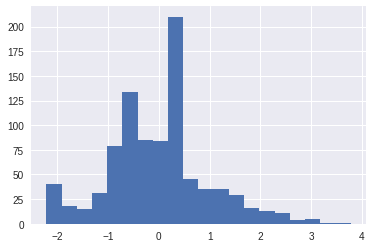

In [65]:
plt.hist(m_age_freq, bins=20)

## Generar un conjunto de entrenamiento y test

In [55]:
df_titanic.shape

(891, 11)

In [66]:
y_label = df_titanic['Survived'].as_matrix()
y_label.shape

(891,)

In [57]:
df_features = df_titanic.drop(['Survived'], axis=1)
df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,1,1,35.0,1,0,113803,53.1000,C123,0,1
4,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [58]:
x_features = df_features.as_matrix()
x_features.shape

(891, 10)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2)

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 10)
(712,)
(179, 10)
(179,)
